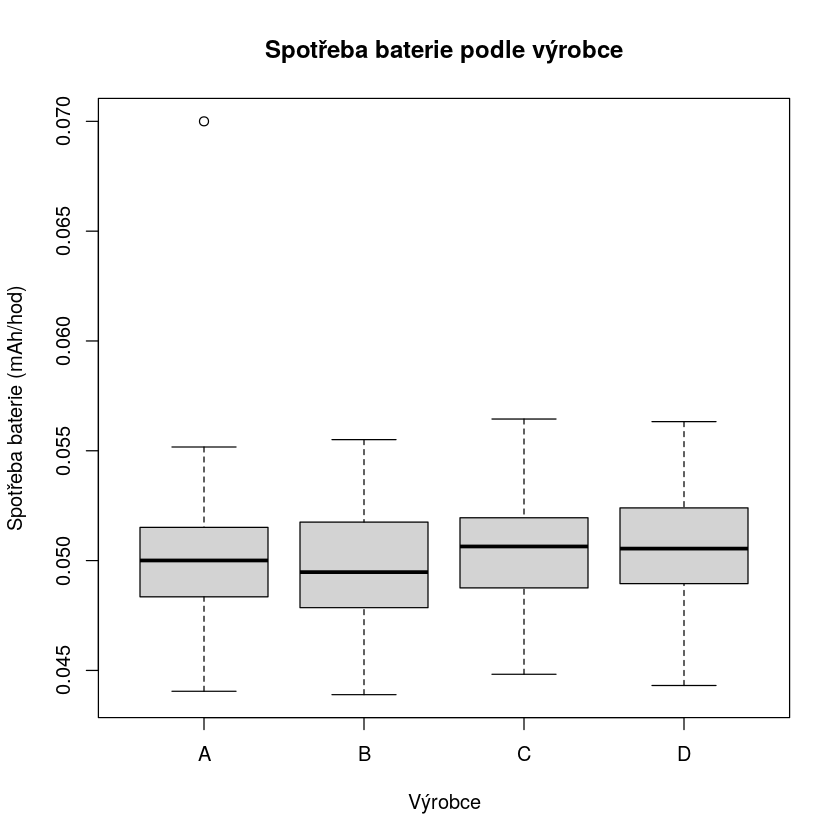

In [28]:
library(readxl)
library(dplyr)
library(ggplot2)
library(rstatix)
library(tidyr)

# Load the data
data <- read_excel("mobilni_telefony_data.xlsx")

# Calculate the power consumption
data <- data %>%
  mutate(spotreba = baterie / vydrz)

# Plot initial boxplot
boxplot(data$spotreba ~ data$znacka, xlab = "Výrobce", ylab = "Spotřeba baterie (mAh/hod)", main = "Spotřeba baterie podle výrobce")


In [29]:

# Remove outliers
OPs <- data %>%
  group_by(znacka) %>%
  identify_outliers(spotreba)
OPs

znacka,id,baterie,vydrz,spotreba,is.outlier,is.extreme
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
A,A038,4.920273,70.28961,0.07,TRUE,TRUE


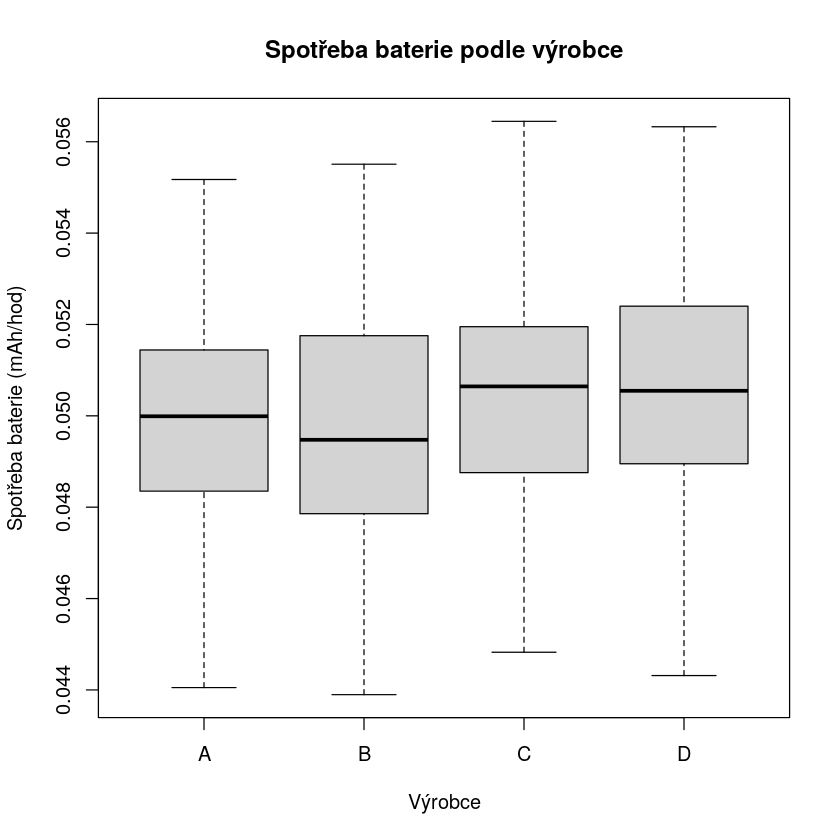

In [30]:
data_clean <- data

data_clean$spotreba <- ifelse(data_clean$id %in% OPs$id, NA, data_clean$spotreba)

# Plot boxplot after removing outliers
boxplot(data_clean$spotreba ~ data_clean$znacka, xlab = "Výrobce", ylab = "Spotřeba baterie (mAh/hod)", main = "Spotřeba baterie podle výrobce")


In [31]:

# Shapiro-Wilk normality test for each brand
normality_tests <- data_clean %>%
  group_by(znacka) %>%
  shapiro_test(spotreba)

# Print normality test results
print(normality_tests)


# A tibble: 4 × 4
  znacka variable statistic     p
  <chr>  <chr>        <dbl> <dbl>
1 A      spotreba     0.992 0.757
2 B      spotreba     0.989 0.416
3 C      spotreba     0.994 0.881
4 D      spotreba     0.988 0.377


In [32]:

# Bartlett test of homogeneity of variances
bartlett_test <- bartlett.test(spotreba ~ znacka, data = data_clean)
bartlett_test


	Bartlett test of homogeneity of variances

data:  spotreba by znacka
Bartlett's K-squared = 1.9864, df = 3, p-value = 0.5752


In [33]:
# ANOVA test
anova_result <- aov(spotreba ~ znacka, data = data_clean)
summary(anova_result)

# Optionally, you can save the plots using ggsave() or output the results to files or directly print them


             Df    Sum Sq   Mean Sq F value  Pr(>F)   
znacka        3 0.0000849 2.829e-05   4.677 0.00313 **
Residuals   475 0.0028730 6.048e-06                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

In [34]:
# Perform Tukey post hoc test
tukey_result <- TukeyHSD(anova_result)

# Print the results
print(tukey_result)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = spotreba ~ znacka, data = data_clean)

$znacka
             diff           lwr          upr     p adj
B-A -5.754828e-05 -8.778279e-04 0.0007627313 0.9978973
C-A  7.717311e-04 -4.854843e-05 0.0015920107 0.0736892
D-A  8.487077e-04  2.842812e-05 0.0016689873 0.0393766
C-B  8.292794e-04  1.071772e-05 0.0016478411 0.0457319
D-B  9.062560e-04  8.769426e-05 0.0017248177 0.0232460
D-C  7.697655e-05 -7.415852e-04 0.0008955383 0.9949855




	Shapiro-Wilk normality test

data:  A_only$spotreba
W = 0.99233, p-value = 0.7572



	One Sample t-test

data:  A_only$spotreba
t = 230.08, df = 118, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.04934484 0.05020161
sample estimates:
 mean of x 
0.04977323 


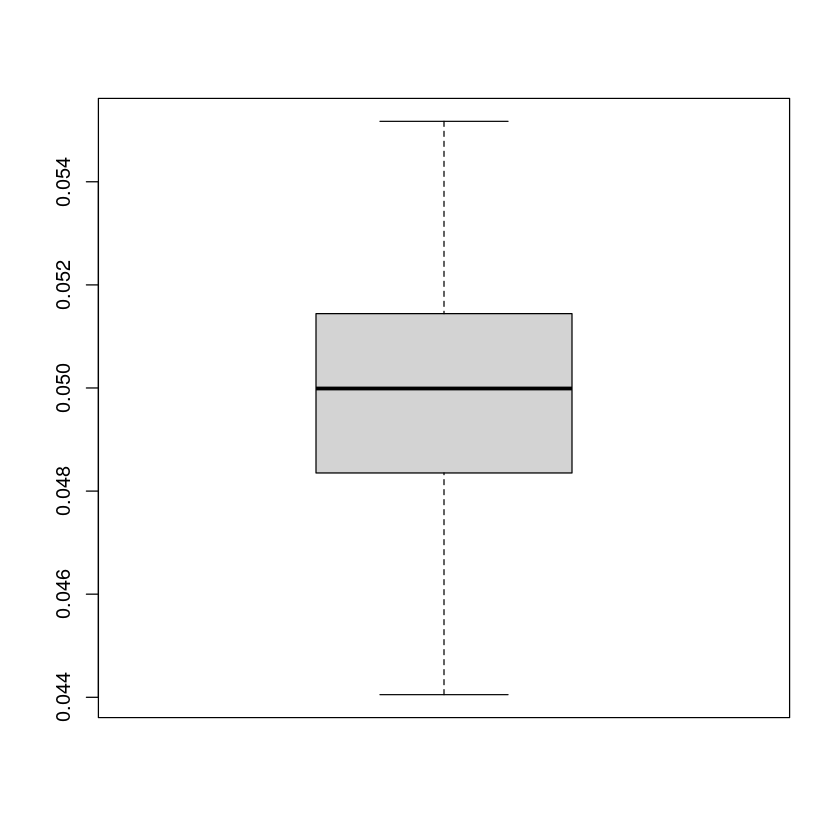

In [37]:
A_only <- data_clean %>%
  filter(znacka == "A")

boxplot(A_only$spotreba)
shapiro.test(A_only$spotreba)
t.test(A_only$spotreba)

In [51]:
0.04977323*0.95

[1] 0.04728457

In [50]:
tab <- table(A_only$spotreba > 0.047)
p <- tab[1] / sum(tab)
p
9 / (p * (1 - p))


FALSE 
0.1176471

FALSE 
 86.7

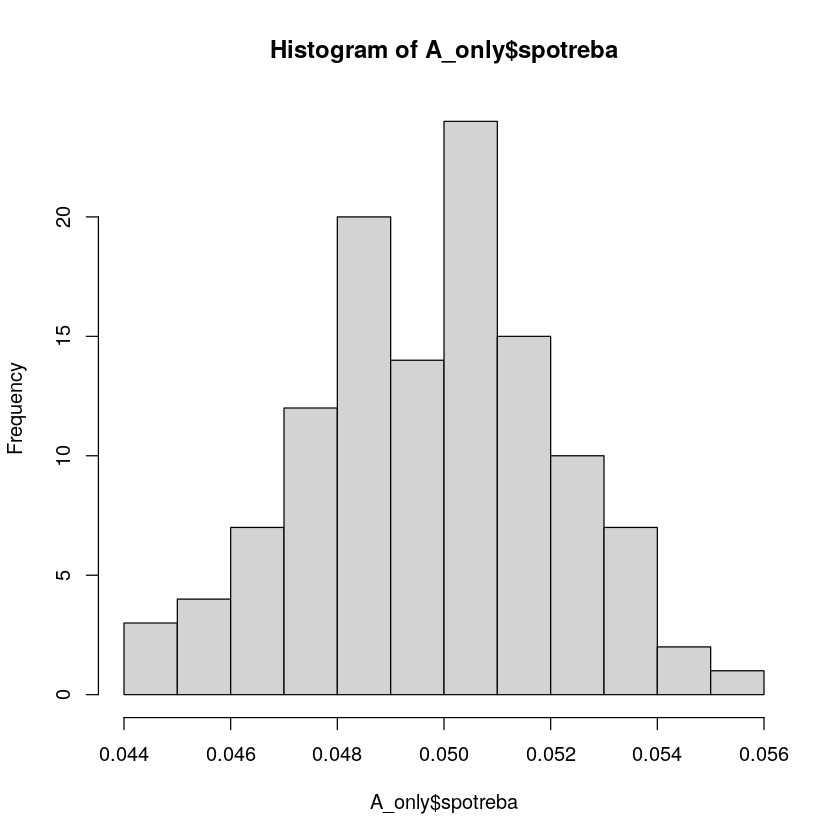

In [40]:
hist(A_only$spotreba)